1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. 

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [1]:
5+2

7

COMENTARIOS:

1)

## Ejercicio 1

(5 puntos) Estudiamos en primer lugar un modelo llamado "perros y pulgas", o también de las "urnas de Ehrenfest".  Suponemos dos perros $A$ y $B$ tales que en el instante $t=0$ $A$ tiene $n$ pulgas (numeradas de $0$ a $n-1$) y $B$ ninguna.  Los perros están durmiendo uno al lado del otro y las pulgas pueden saltar de uno a otro sin problema. La regla de evolución del sistema es la siguiente: Si en el instante $t$, $L_A(t)$  y $L_B(t)$ son las listas de pulgas en $A$ y $B$, elegimos un entero aleatorio en el intervalo cerrado  $[0,n-1]$ y la pulga que lleva ese número salta cambiando de perro. Así obtenemos las nuevas listas $L_A(t+1)$  y $L_B(t+1)$ que determinan el estado del sistema en el instante $t+1$ (el tiempo es, como en otros ejemplos que hemos considerado,  discreto $t=0,1,2,3,\dots$).  

A) En primer lugar programa una función $siguiente(n,L_A,L_B)$ que reciba el estado del sistema en un instante  y devuelva el estado en el siguiente. 

B) Realiza un gráfico que represente, comenzando con $1000$ pulgas en $A$,  la evolución temporal del número de pulgas en $B$.  Debe observarse claramente la estabilización del número de pulgas, y, a partir de ese momento, oscilaciones pequeñas.

C) Cambia la función del apartado $A$ por otra,  $siguiente1(n,n_B)$,  que únicamente tenga en cuenta el número de pulgas en el perro $B$ ($n_A+n_B=n$ en todo momento). A fin de cuentas, ¿qué nos importa cómo se llama la pulga que ha saltado al pasar del instante $t$ al $t+1$? Nos debe bastar con saber cuántas pulgas hay en cada perro, y el comportamiento del sistema debe ser el mismo que con  la versión en el apartado A).  Repite el gráfico del apartado B) y comprueba que se obtiene, esencialmente, el mismo.

D) Estudia ahora la siguiente variante del modelo: para pasar del estado $t$ al $t+1$:

1) Elegimos aleatoriamente uno de los dos perros. 

2) Cada perro tiene una probabilidad,  $p_A$ o $p_B$ que no cambia, de que una pulga salte al otro.

3) Cuando un perro ha sido elegido en el sorteo realizado en 1) y tiene pulgas, una pulga salta al otro perro con probabilidad  $p_A$, si se trata del perro $A$, o $p_B$ si el elegido es $B$.

¿Se estabiliza el número de pulgas en cada perro? A largo plazo, ¿qué se obtiene para el número de pulgas en $B$? La respuesta dependerá de los valores de $p_A$ y $p_B$ utilizados, y para responder se pueden realizar gráficos con diferentes valores de las probablidades.


In [23]:
### Apartado A
def siguiente(n, La, Lb):
    #Buscamos un numero aleatorio entre 0 y n-1
    pulga = floor(random()*n)
    #Si esta en el perro b
    if(La[pulga]==0):
        La[pulga]=1
        Lb[pulga]=0
    #Si no, esta en el perro a
    else:
        La[pulga]=0
        Lb[pulga]=1

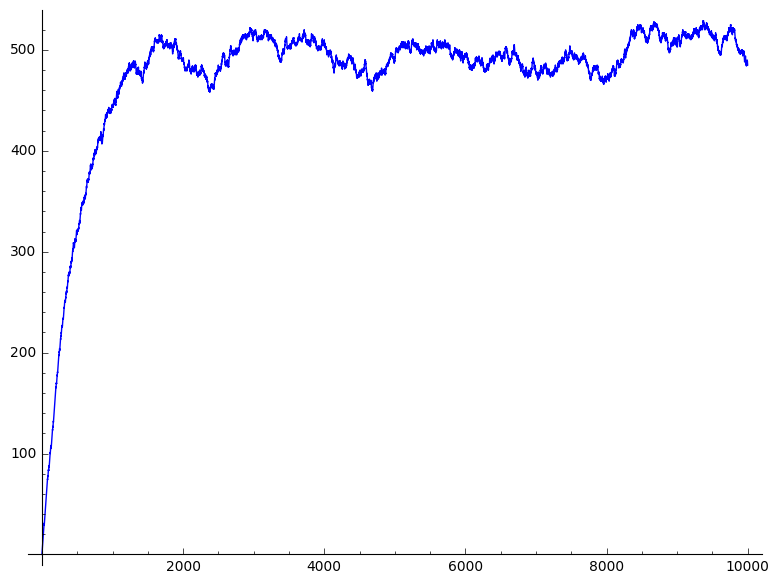

In [38]:
### Apartado B
def pulgasEnB(inicial, iteraciones):
    La = [1]*inicial
    Lb = [0]*inicial
    L=[0]
    for i in srange(0,iteraciones):
        siguiente(inicial, La, Lb)
        L.append(sum(Lb))
   
    return L

iteraciones = 10000
line(zip(srange(iteraciones),pulgasEnB(1000,iteraciones)))

Vemos que se aprecia  que se aproxima hasta los 500 (que es la mitad de 1000) 
y se mantiene ahi con pequeñas oscilaciones.

In [86]:
## Apartado C
def siguiente1(n,nB):
    #Si la probabilidad de que una pulga salte de B a A sera nB/n,
    #y la probabilidad de que salte de A a B sera 1 - nB/n, por tanto:
    if(random()<nB/n):
        #Salta una pulga de B a A
        nB = nB-1
    else:
        #Salta una pulga de A a B
        nB = nB +1
    return nB

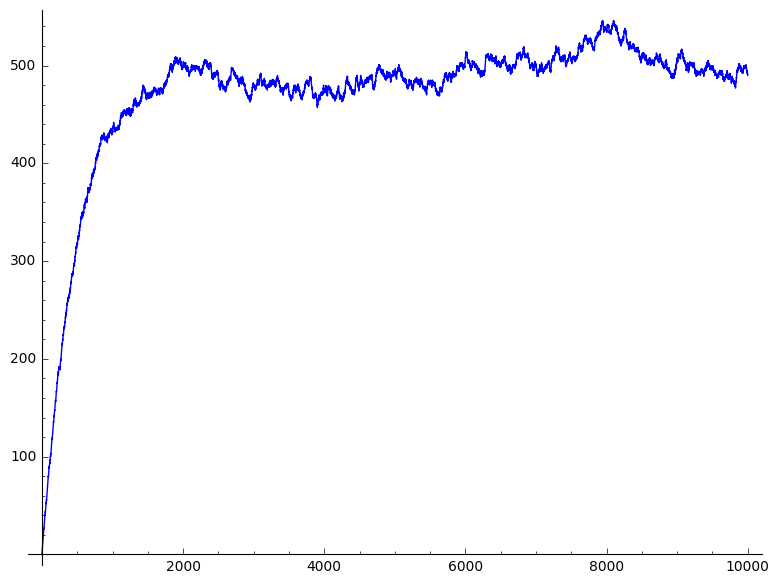

In [87]:
def pulgasEnB1(inicial, iteraciones):
    nB=0
    L=[0]
    for i in srange(0,iteraciones):
        nB=siguiente1(inicial, nB)
        L.append(nB)
   
    return L

iteraciones = 10000
line(zip(srange(iteraciones),pulgasEnB1(1000,iteraciones)))

Vemos que esta funcion se comporta de manera muy similar

In [88]:
## Apartado D
def siguiente2(pA, pB, n, nB):
    if(random()<0.5):
        #Una pulga salta del perro A al perro B
        #Comprobamos si el perro A tiene pulgas
        if(nB<n):
            #Lanzamos la moneda trucada con probabilidad pA
            if(random()<pA):
                nB = nB+1
    else:
        #Una pulga salta del perro B al perro A
        #Comprobamos si el perro B tiene pulgas
        if(nB<n):
            #Lanzamos la moneda trucada con probabilidad pB
            if(random()<pB):
                nB = nB-1
    return nB

In [89]:
def pulgasEnB2(inicial, iteraciones, pA, pB):
    nB=0
    L=[0]
    for i in srange(0,iteraciones):
        nB=siguiente2(pA,pB, inicial, nB)
        L.append(nB)
   
    return L

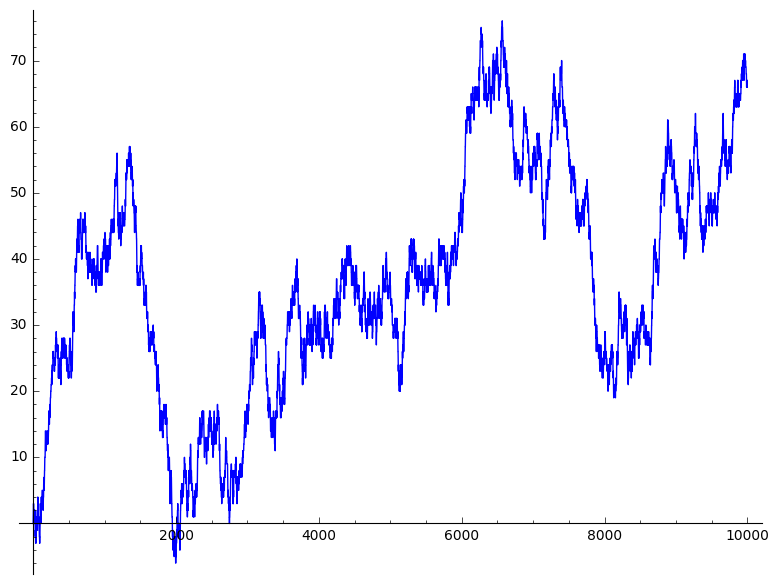

In [90]:
iteraciones = 10000
pA = 0.5
pB = 0.5
line(zip(srange(iteraciones),pulgasEnB2(1000,iteraciones, pA,pB)))

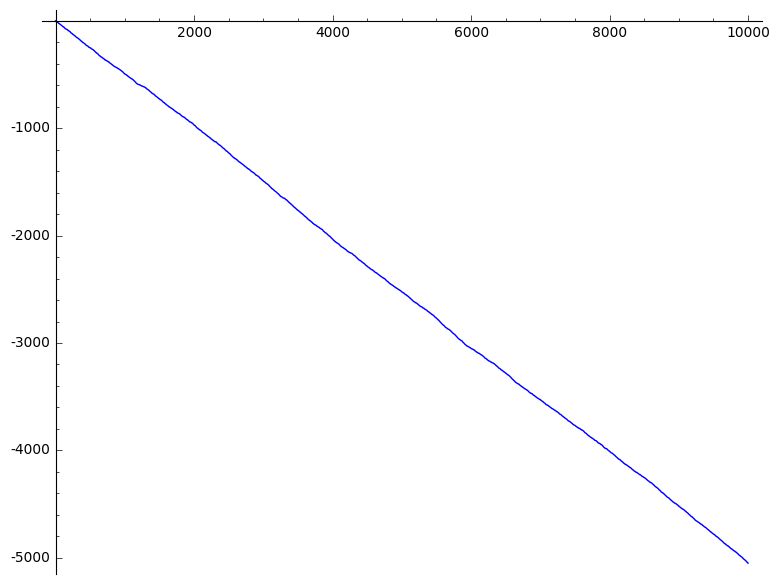

In [91]:
iteraciones = 10000
pA = 0
pB = 1
line(zip(srange(iteraciones),pulgasEnB2(1000,iteraciones, pA,pB)))

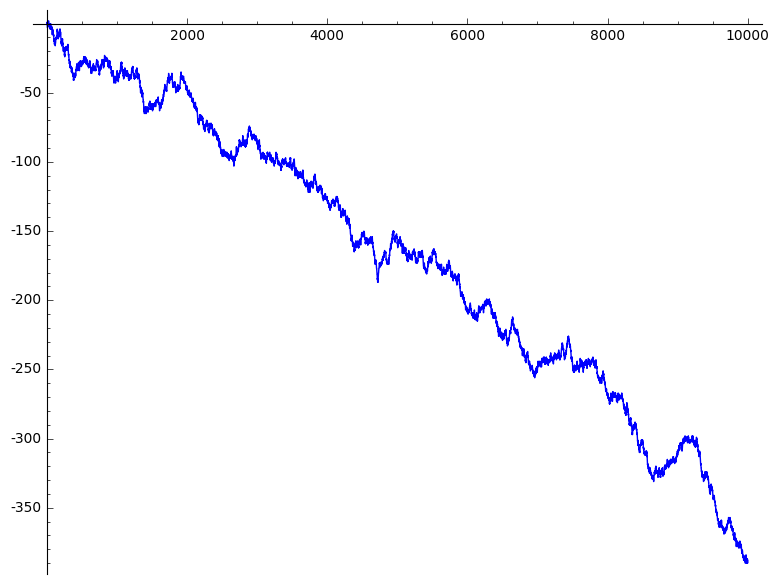

In [92]:
iteraciones = 10000
pA = 0.7
pB = 0.8
line(zip(srange(iteraciones),pulgasEnB2(1000,iteraciones, pA,pB)))

Podemos apreciar que, tal y como cambria esperar, si la probabilidad
es constante, si pA = pB, tenemos que sale un grafico aleatorio,
sin embargo si pA < pB, tenemos que el perro B ira quedandose sin pulgas
y se las ira llevando todas A poco a poco. Lo contrario ocurre si pA > pB.


## Ejercicio 2

(5 puntos)  Supongamos una baraja de cartas inicialmente ordenada. Conocemos, con absoluta certeza, dónde está cada carta de la baraja. Cuando empezamos a barajar la incertidumbre va aumentando, y queremos estudiar este proceso de "aumento de incertidumbre".  Representamos el estado inicial de la baraja de $n$ cartas mediante la lista $srange(n)$, y cualquier estado mediante una reordenación de esta lista.

A) Define una función $barajar(L)$ que reciba una lista, que representa un estado de la baraja, y devuelva la lista $L$ barajada una única vez de acuerdo al siguiente algoritmo:
    
    1) Producimos, aleatoriamente con igual probabilidad de cero o uno,  una lista $LA$  de ceros y unos de longitud $n$. Sea $k$ el número de ceros que hemos obtenido.
    
    2) Llamemos $L1$ a la sublista de $L$ formada por los primeros $k$ elementos de $L$ y $L2$ al resto de $L$.
    
    3) Sea $L3$, inicialmente una lista vacía, la lista en la que vamos a guardar la reordenación de la lista $L$. Recorremos la lista $LA$ y cada vez que encontramos un cero pasamos el primer elemento de la lista $L1$ a $L3$, y cada vez que encontramos un $1$ pasamos el primer elemento de $L2$ a $L3$.
    
    4) Al terminar devolvemos $L3$. Se llama a esta forma de barajar *riffle shuffle*.

B) ¿Qué es un estado del sistema en este caso? Podríamos decir que es una permutación de la lista $srange(n)$, pero en nuestra situación de incertidumbre acerca de la ordenación obtenida después de barajar es mejor decir que *un estado del sistema es una distribución de probabilidad sobre el conjunto de las $n!$ reordenaciones de la lista*, y, más concretamente, *una lista de $n!$ reales positivos $p_i$ tales que su suma total es $1$*. 

En el estado inicial de la baraja podemos suponer que el estado es $[1,0,0,\dots,0,0]$, y cualquier estado sobre el que no hay incertidumbre tendría un $1$ en algún lugar y el resto serían ceros. En cambio, si barajamos, una o varias veces, y no miramos la ordenación obtenida el estado es una distribución de probabilidad que nos dice cómo de probable es cada reordenación.
 
 C) ¿Cómo se mide la cantidad de información? Claude Shannon, creador en 1948 de la teoría de la información, llegó a una solución que ya era conocida en física con el nombre de *entropía*. Concretamente, si $L$ es una lista que representa una distribución de probablidad sobre $N$ objetos, definió su cantidad promedio de información en bits $I(L)$ en la forma
 $$I(L)=-\sum_{p_i\in L}p_ilog_2(p_i),$$
 de forma que un estado seguro (sin incertidumbre alguna)  tiene una cantidad de información nula.
 
 D) Como $n!$ crece bestialmente con $n$, no es posible realizar el experimento que propongo con una baraja real de $52$ cartas. Tomamos entonces $n=7$, y se trata de averiguar, mediante un experimento adecuadamente planeado,    cuántas veces debemos barajar hasta que  el contenido de información del estado  resultante (la incertidumbre) es  máximo. En ese momento podremos decir que *``la baraja ha sido bien barajada''*.
 


In [141]:
def unosCerosRand(n):
    #Creamos un numero aleatorio con n digitos en binario, y lo 
    #pasamos a binario:
    num = floor(random()*(2**n))
    return num.digits(base=2,padto=n)

def barajar(x):
    L = list(x)
    unosYCeros = unosCerosRand(len(L))
    #Buscamos los ceros
    ceros = 0
    for i in srange(len(L)):
        if(unosYCeros[i]==0):
            ceros = ceros + 1
    #Inicializamos L3
    L3=[]
    #Aunque podriamos haber hecho L1 = [ceros:] y L2 = [:ceros], este
    #metodo me parecio mas eficiente: marcamos el punto en el que comienza
    #cada sublista, y conforme vamos sacando elementos vamos cambiando el
    #comienzo de la sublista
    marcaL1=0
    marcaL2=ceros
    
    for i in srange(len(L)):
        if(unosYCeros[i]==0):
            L3.append(L[marcaL1])
            marcaL1=marcaL1+1
        else:
            L3.append(L[marcaL2])
            marcaL2 = marcaL2+1
    return L3
            
        

In [182]:
##Apartado D
def cantidadDeInformacion(L):
    suma = 0
    for i in srange(len(L)):
        suma = sumaL + L[i]*log(L[i], 2)
    return -suma

In [189]:
#Podemos coger la lista de cartas y juntarlas en un numero,
#de esta manera, tendremos un numero asociado a cada posible permutacion
#Esta funcion devuelve el numero en orden inverso, pero eso no nos importa
#en este ejercicio. (Se entiende mejor esto si se prueba a ejecutar
#juntarLista([1,2,3,4], 10) y comandos similares)
def juntarLista(L, n):
    numero = 0
    for i in srange(len(L)):
        numero = numero + L[i]*((n)**i)
    return numero

In [190]:
def barajarVeces(m,L):
    lista = list(L)
    for muda in srange(m):
        lista=barajar(lista)
    return lista

In [191]:
barajarVeces(2,[1,2,3])

[3, 2, 1]

In [215]:
def buscarIncertidumbreMaxima(nCartas, iteraciones, nMax):
    informaciones = [0]*nMax;
    listaBasica = []
    #Preparamos la lista ordenada que servira de base
    for i in srange(nCartas):
        listaBasica.append(i)
   
    for i in srange(nMax):
        informaciones[i]= cantidadDeInformacion(
            probPermutaciones(listaBasica, 
                        iteraciones, nCartas, i))
    
    return max(informaciones)

In [219]:
#Este metodo devolvera la probabilidad de que salga cada una de las 
#permutaciones tras barajar m veces L, de tal manera que la probabilidad
#total sea 1
def probPermutaciones(L,iteraciones, n, m):
    listaPerm=[0]*factorial(n)
    resta = (n+1)**(n+1) - factorial(n)
    for i in srange(iteraciones):
        reordenacion = juntarLista(barajarVeces(m,L),n) + resta
        #A reordenacion hay que restarle todos los valores
        #que podria devolver juntarLista que no fueran permutaciones
        #por ejemplo (1,2,1) no es permutacion de (1,2,3)
        #eso se ha intentado hacer con el parametro resta
        #pero no se ha hecho bien y reordenacion sale mayor
        #que el factorial(n), y por tanto, fuera de los limites
        #de la lista.
        listaPerm[reordenacion]=listaPerm[reordenacion] + 1/iteraciones
    return listaPerm

In [220]:
buscarIncertidumbreMaxima(10, 10, 5)

IndexError: list index out of range

In [204]:
factorial(11)

39916800